In [55]:
import os
import numpy as np
import scipy.ndimage as ndi


from skimage import io
from skimage.filters import *
from skimage.feature import *
from skimage.morphology import *
from scipy.ndimage import gaussian_filter


In [2]:
os.listdir()

['C2-Zproj_vebtk_44_2.tif',
 'Untitled.ipynb',
 '.ipynb_checkpoints',
 'C2-Zproj_vebtk_44_2-1.tif']

In [3]:
small = io.imread('C2-Zproj_vebtk_44_2-1.tif')

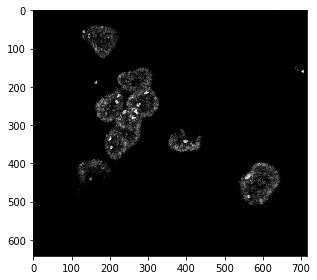

In [4]:
io.imshow(small)

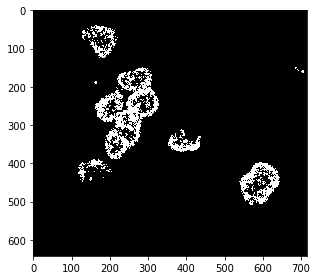

In [7]:
io.imshow((small > threshold_otsu(small)))

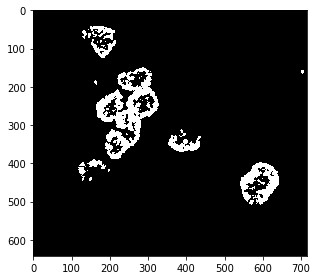

In [6]:
io.imshow((gaussian_filter(small, 1) > threshold_otsu(small)))

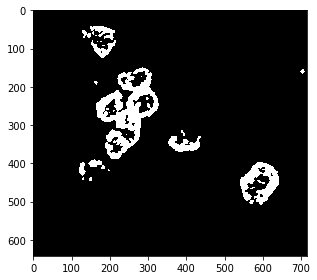

In [10]:
io.imshow((gaussian_filter(small, 2) > threshold_otsu(small)))

In [11]:
small = gaussian(small)

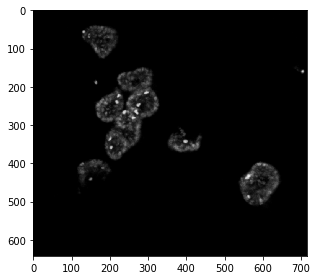

In [12]:
io.imshow(small)

In [13]:
binary = small > threshold_otsu(small)

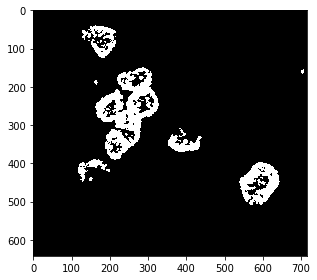

In [14]:
io.imshow(binary)

In [21]:
dilation_array = [[1, 1, 1],
                 [1, 1, 1],
                 [1, 1, 1]]
dilation_array = np.array(dilation_array)

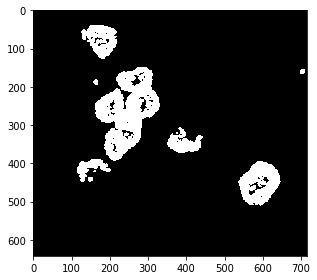

In [23]:
io.imshow(binary_dilation(binary_dilation(binary, selem=dilation_array)))

In [24]:
binary_2 = binary_dilation(binary_dilation(binary, selem=dilation_array))

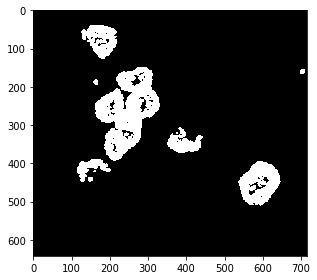

In [25]:
io.imshow(binary_2)

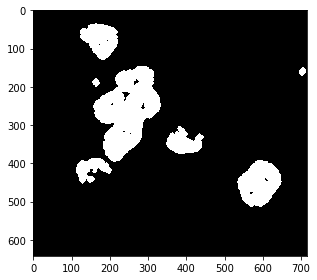

In [31]:
io.imshow((binary_dilation(binary_dilation(binary_dilation(binary_2)))))

/Users/pgb13/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


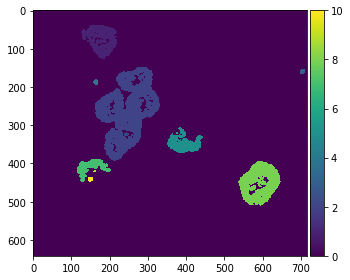

In [32]:
io.imshow(label(binary_2))

In [47]:
bin_2 = closing(binary, square(15))

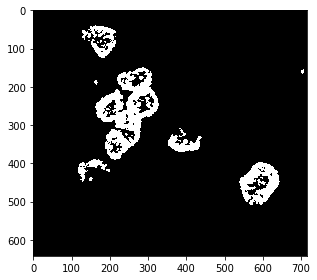

In [51]:
io.imshow(binary)

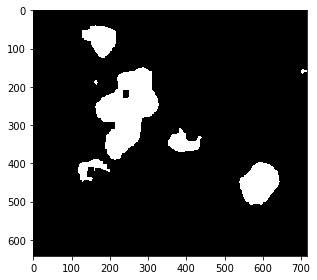

In [48]:
io.imshow(bin_2)

/Users/pgb13/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


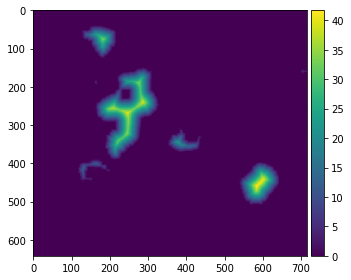

In [56]:
distance = ndi.distance_transform_edt(bin_2)
io.imshow(distance)

In [78]:
local_max = peak_local_max(distance, indices=False, min_distance=18)
markers = ndi.label(local_max)[0]

/Users/pgb13/anaconda3/lib/python3.7/site-packages/skimage/util/arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)
/Users/pgb13/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


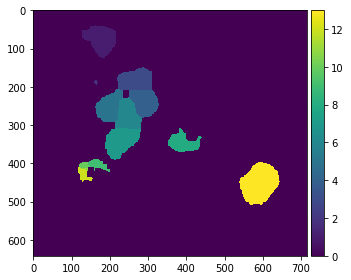

In [79]:
io.imshow(watershed(-distance, markers, mask=bin_2))